#Kya Allen - Stat 414 - HW 6 raw Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [4]:
df1 = pd.read_csv('HW6data2.csv')
df2 = pd.read_csv('HW6data1.csv')

#Testing the Large Dataset for Exponentiality

In [5]:
df1.describe()

,x
count,50.000000
mean,3.381018
std,3.502513
min,0.009818
25%,0.967100
50%,2.202139
75%,5.101106
max,17.502511


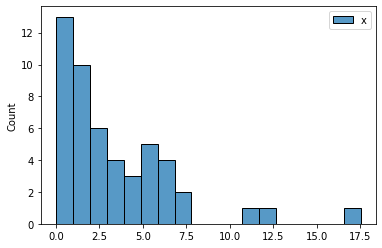

In [6]:
#A historgram of the data
sns.histplot(df1, bins=18)

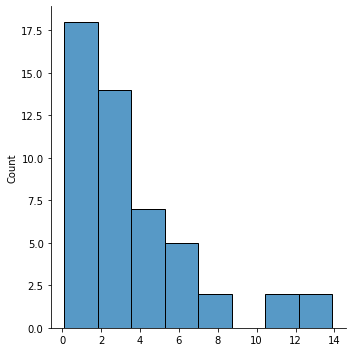

In [3]:
sns.displot(np.random.exponential(size=50, scale=3.381018), kind='hist')
## a sample randomly generated from an exponential distribution with the correct parameters
## to get an intuitive idea of whether our data is similar to what we'd expect
plt.show()

In [7]:
obsCounts = []
##create a vector of observered counts
for i in range (0,18):
    tempCount = 0
    for j in df1.x:
        if j >= i and j < i + 1:
            tempCount = tempCount + 1
    obsCounts.append(tempCount)

countsObs = np.array(obsCounts)
countsObs

array([15,  8,  6,  5,  3,  4,  4,  2,  0,  0,  0,  1,  1,  0,  0,  0,  0,
        1])

In [42]:
expCounts =  []
##create a vector of expected values from the theoretic exponential distribution (Later discarding this method)
for i in range (0,18):
    part1 = (50 / 3.381018) * np.exp(-(i / 3.381018))
    part2 = (50 / 3.381018) * np.exp(-((i + 1) / 3.381018))
    tempCount = part1 - part2
    expCounts.append(tempCount)

countsExp = np.array(expCounts)
countsExp

array([3.78644344, 2.81695993, 2.09570363, 1.55911827, 1.15992059,
       0.86293374, 0.64198761, 0.47761267, 0.35532441, 0.26434691,
       0.19666335, 0.14630953, 0.10884834, 0.08097874, 0.06024489,
       0.04481975, 0.03334407, 0.02480663])

## This method, using the equation presented in class seemed to give unintuitive results, and I couldn't figure out why

In [9]:
X2vector = ((countsObs - countsExp) ** 2) / countsExp
X2vector

array([3.32089606e+01, 9.53648793e+00, 7.27370511e+00, 7.59382231e+00,
       2.91907247e+00, 1.14043341e+01, 1.75645869e+01, 4.85259981e+00,
       3.55324406e-01, 2.64346907e-01, 1.96663348e-01, 4.98113415e+00,
       7.29594276e+00, 8.09787402e-02, 6.02448894e-02, 4.48197477e-02,
       3.33440695e-02, 3.83366077e+01])

In [10]:
ChiSquare = np.sum(X2vector)
ChiSquare

146.00297587207444

## here the chi-square test gave unintuitive results as well
## to compensate, I used a Ti-84 to calculate the integral for each interval under the exponential curve
## with the correct parameters

In [58]:
countsExp_2 = np.array([12.802092, 9.5242208, 7.0856218, 5.2714061, 3.9217056, 
                       2.9175839, 2.1705611, 1.6148066, 1.2013486, 0.89375308, 
                       0.66491489, 0.49466886, 0.36801294, 0.27378623, 
                       0.2036855, 0.15153349, 0.11273457, 0.08386981])
X2vector_2part1 = np.array((np.square(countsObs - countsExp_2)))
X2vector_2 = X2vector_2part1 / countsExp_2
ChiSquare_2 = np.sum(X2vector_2)
ChiSquare_2

18.163991204403935

## df = (k-2) = (18-2) = (16); Rejection region is X2 > 26.296 for a 5% alpha level

# Testing the small dataset for Exponentiality

In [11]:
df2.describe()

,x
count,15.000000
mean,2.710228
std,1.461153
min,0.459298
25%,1.541557
50%,2.743928
75%,3.790357
max,5.012110


In [59]:
## quantile of observed values, ordered
X_order = np.sort(np.array(df2.x))
## Exponential Quantile calculated manually
ExpTheoretic = np.array([0.5549513606, 0.7763362504, 1.017079909, 1.280837487, 1.572392272,
                         1.898167102, 2.267059188, 2.691876606, 3.191978123, 3.798552866,
                         4.566450678, 5.605371249, 7.186337334, 10.34826951, 11.70338329])

#creating an array-like of the observed ordered values vs the theoretic
dfReg = pd.DataFrame(columns=['predictor , response'])
dfReg['predictor'] = ExpTheoretic
dfReg['response'] = X_order

## Using the Ordinary Least Squares function from the Statsmodels Statistical Package

In [26]:
#first a Simple linear Regression (this is not strictly neccessary, but I wanted to Compare)
SimpleLinearModel = sm.OLS(X_order, ExpTheoretic).fit()
print(SimpleLinearModel.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.890
Method:                 Least Squares   F-statistic:                              122.2
Date:                Sun, 04 Apr 2021   Prob (F-statistic):                    2.66e-08
Time:                        05:14:12   Log-Likelihood:                         -20.977
No. Observations:                  15   AIC:                                      43.95
Df Residuals:                      14   BIC:                                      44.66
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [61]:
## now a Quadratic Regression. 
results = sm.OLS.from_formula(formula='response ~ predictor + np.square(predictor)', data=dfReg).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     207.3
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           4.96e-10
Time:                        07:05:26   Log-Likelihood:                0.32645
No. Observations:                  15   AIC:                             5.347
Df Residuals:                      12   BIC:                             7.471
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.2086 

## The T-test performed by the statistical package indicates that the effect of the sqaured term is significant with a p-value 
## of < 0.001
## Conclude that the Sample is does not match an exponential distribution.

# Part B 
### Hypothesis testing for the mean on data set 2
####This dataset is relatively large, so a student's t-test should be acceptable (H0: x < 3.2 ; Ha: x >= 3.2)

In [62]:
df1.describe()

,x
count,50.000000
mean,3.381018
std,3.502513
min,0.009818
25%,0.967100
50%,2.202139
75%,5.101106
max,17.502511


In [70]:
#scripting a basic t-test
upperT = df1.mean() - 3.2
LowerT = df1.std() / np.sqrt(df.count())
T_Value = upperT / LowerT

T_Value

x    0.126596
y         NaN
dtype: float64

#### df = n-1, alpha = 0.05, one-tailed test. rejection threshold = 1.68
#### T < 1.68, We fail to reject the null hypothesis. We cannot conclude that the mean concentration level is greater than 3.2 at the 0.05 level

# part c - Power Analysis

In [83]:
df2.describe()

,x
count,15.000000
mean,2.710228
std,1.461153
min,0.459298
25%,1.541557
50%,2.743928
75%,3.790357
max,5.012110


In [90]:
from statsmodels.stats.power import TTestPower
powerAnalysis = TTestPower()
# computing a sample size for 3 different effect sizes
SampleSize_SmolD = powerAnalysis.solve_power(power=0.95, alpha=0.05, effect_size = 0.2, alternative='larger')
SampleSize_MedD = powerAnalysis.solve_power(power=0.95, alpha=0.05, effect_size = 0.5, alternative='larger')
SampleSize_BigD = powerAnalysis.solve_power(power=0.95, alpha=0.05, effect_size = 0.8, alternative='larger')
print(SampleSize_SmolD)
print(SampleSize_MedD)
print(SampleSize_BigD)

271.91337524050454
44.67997720983872
18.358376104265048
